# Classification Project: Telco Churn

## Table of Contents

* [Package Imports](#packages_import)
* [Acquire](#data_import)
* [Prepare](#prepare)
* [Explore Process](#explore1)
    * [Question 1](#q_1)
        * [Q1 Visualization](#q_1_viz)
        * [Q1 Statistical Test](#q_1_stats)
        * [Q1 Answer](#q_1_ans)
    * [Question 2](#q_2)
        * [Q2 Visualization](#q_2_viz)
        * [Q2 Statistical Test](#q_2_stats)
        * [Q2 Answer](#q_2_ans)    
    * [Question 3](#q_3)
        * [Q3 Visualization](#q_3_viz)
        * [Q3 Statistical Test](#q_3_stats)
        * [Q3 Answer](#q_3_ans)    
    * [Question 4](#q_4)
        * [Q4 Visualization](#q_4_viz)
        * [Q4 Statistical Test](#q_4_stats)
        * [Q4 Answer](#q_4_ans)
    * [Question 5](#q_5)
        * [Q5 Visualization](#q_5_viz)
        * [Q5 Statistical Test](#q_5_stats)
        * [Q5 Answer](#q_5_ans)
    * [Question 6](#q_6)
        * [Q6 Visualization](#q_6_viz)
        * [Q6 Statistical Test](#q_6_stats)
        * [Q6 Answer](#q_6_ans)
* [Explore Summary](#explore2)
* [Modeling](#modeling)
    * [Introduction](#m_intro)
    * [Baseline](#baseline)
    * [Model 1](#mod_1)
    * [Model 2](#mod_2)
    * [Model 3](#mod_3)
* [Conclusion](#conclusion)
    * [Summery](#c_summery)
    * [Recommendations](#c_recs)
    * [Next Steps](#c_steps)
* [ReadMe](#readme)

## Package Imports <a class="anchor" id="packages_import"></a>


In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#These imports were constructed
from acquire import get_telco_data
from prepare import prep_telco, train_validate

#Tools to build machine learning models and reports
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Removes warnings and imporves asthenics
import warnings
warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None

## Acquire<a class="anchor" id="data_import"></a>

In [2]:
#First tries to get telco data from catche or aquires new data from MySQL database and assigns it to the master Data Frame: 
master_df = get_telco_data()

## Prepare <a class="anchor" id="prepare"></a>

In [3]:
#Takes the master_df and prepares the data for statistical and machine learning analysis:
working_df = prep_telco(master_df)
working_df.head()

,paperless_billing,senior_citizen,partner,dependents,monthly_charges,total_charges,churn,tenure,gender_Female,gender_Male,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,online_security_No,online_security_No internet service,online_security_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,1,0,1,1,65.6,593.30,0,9.0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,59.9,542.40,0,9.0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,73.9,280.85,1,4.0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
3,1,1,1,0,98.0,1237.85,1,13.0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,1,1,1,0,83.9,267.40,1,3.0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0


In [4]:
#Seperate data into train(80%), validate(14%) and test(6%) Data Frames:
#Random seed of 1969
train_df, val_df, test_df = train_validate(working_df, stratify_col='churn')
sum(train_df.churn) / len(train_df.churn)

0.2652802434694395

In [5]:
train_df.head()

,paperless_billing,senior_citizen,partner,dependents,monthly_charges,total_charges,churn,tenure,gender_Female,gender_Male,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,online_security_No,online_security_No internet service,online_security_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
2904,0,0,0,0,90.75,174.75,0,2.0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0
4584,1,0,1,1,99.35,4749.15,1,48.0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
6709,1,0,0,0,87.75,1242.20,0,14.0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
657,1,0,0,1,109.20,5290.45,0,48.0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
164,0,0,1,1,100.70,1522.70,0,15.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0


## Explore process <a class="anchor" id="explore1"></a>

In [6]:
#Split into a churn and not churn DataFrame to explore:
churn_df = train_df[train_df.churn == 1]
print(f'churn_df length: {len(churn_df)}')
no_churn = train_df[train_df.churn == 0]
print(f'no_churn length: {len(no_churn)}')

churn_df length: 1046
no_churn length: 2897


Takeaway: there are 26.5% of people that churned and 73.5% have not churned.

In [7]:
#Printing a comparison between the baseline and the churn/no_churn DataFrames:
print('Column ------------------------------------- Churn ----- Deviation ---- Baseline --- Deviation --- No Churn')
for item in churn_df:
    bl = round(sum(train_df[item]) / len(train_df[item]) * 100,1)
    churn = round(sum(churn_df[item]) / len(churn_df[item]) * 100,1)
    no_c = round(sum(no_churn[item]) / len(no_churn[item]) * 100,1)
      
    print(f'{item:38} | {churn:10} % | {churn - bl:10.1f} | {bl:10}% | {no_c - bl:10.1f} | {no_c:10} % |')
    print('')

Column ------------------------------------- Churn ----- Deviation ---- Baseline --- Deviation --- No Churn
paperless_billing                      |       75.1 % |       15.6 |       59.5% |       -5.7 |       53.8 % |

senior_citizen                         |       24.6 % |        8.8 |       15.8% |       -3.2 |       12.6 % |

partner                                |       35.6 % |      -12.8 |       48.4% |        4.7 |       53.1 % |

dependents                             |       19.0 % |      -11.6 |       30.6% |        4.2 |       34.8 % |

monthly_charges                        |     7443.9 % |      976.9 |     6467.0% |     -352.7 |     6114.3 % |

total_charges                          |   151669.0 % |   -75553.3 |   227222.3% |    27279.5 |   254501.8 % |

churn                                  |      100.0 % |       73.5 |       26.5% |      -26.5 |        0.0 % |

tenure                                 |     1796.0 % |    -1449.7 |     3245.7% |      523.5 |     3769.2 %

Features with a high or low deviation from the baseline to focus on: 
1. contract_type_Month-to-month (high) 34.6%
2. internet_service_type_Fiber optic (high) 25.7%
3. payment_type_Electronic check (high) 24.3%
4. internet_service_type_None (low) -15.6%
- device_protection_No internet service (low) -15.6%
- online_security_No internet service (low) -15.6%
- online_backup_No internet service (low) -15.6%
- tech_support_No internet service (low) -15.6%
- streaming_tv_No internet service (low) -15.6%
- streaming_movies_No internet service (low) -15.6%
5. paperless_billing (high) 15.6%
6. dependents (low) -11.6%


<AxesSubplot:xlabel='monthly_charges', ylabel='tenure'>

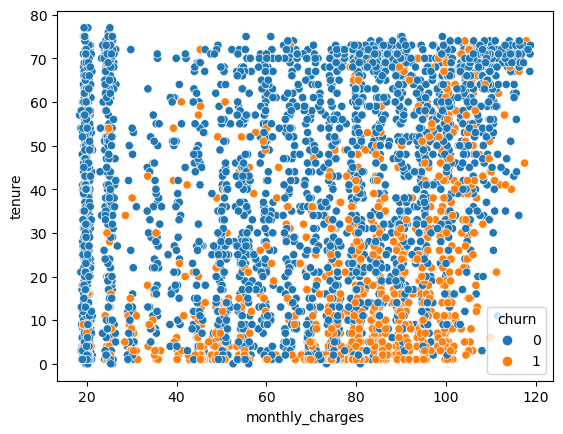

In [8]:
#building a plot to show a relationship
sns.scatterplot(data = train_df, 
                y = 'tenure', 
                x = 'monthly_charges', 
                hue='churn')

Takeaway: It appears that a low tenure and high monthly charge have a relationship with churn.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

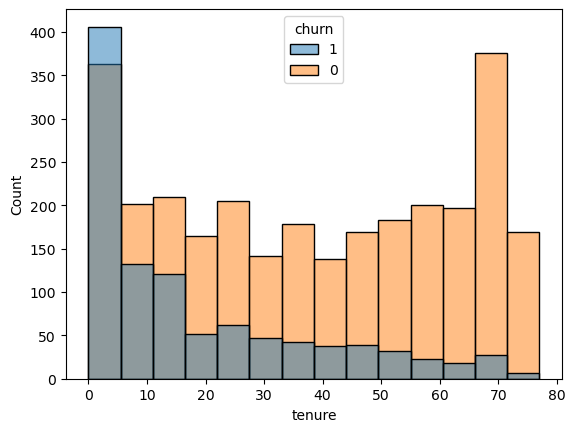

In [9]:
#
sns.histplot(x='tenure', data=train_df, hue='churn',hue_order=[1,0])

Customers who churn tend to have much shorter tenure.

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

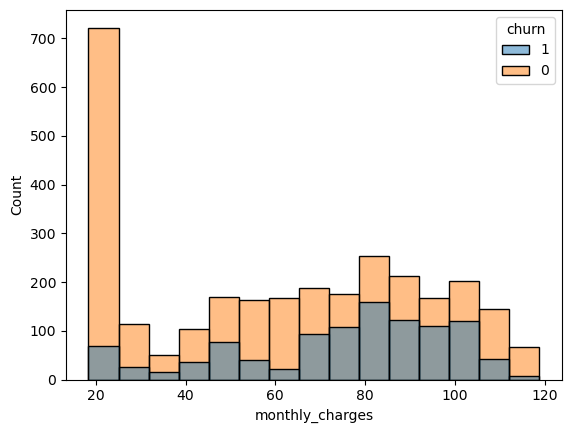

In [10]:
sns.histplot(x='monthly_charges', data=train_df, hue='churn', hue_order=[1,0])

Customers who churn tend to have much shorter tenure.

### Question 1 <a class="anchor" id="q_1"></a>

What is the relatiohship between having a contract type of Month-to-month and churn?

#### Q1 Visualization <a class="anchor" id="q_1_viz"></a>

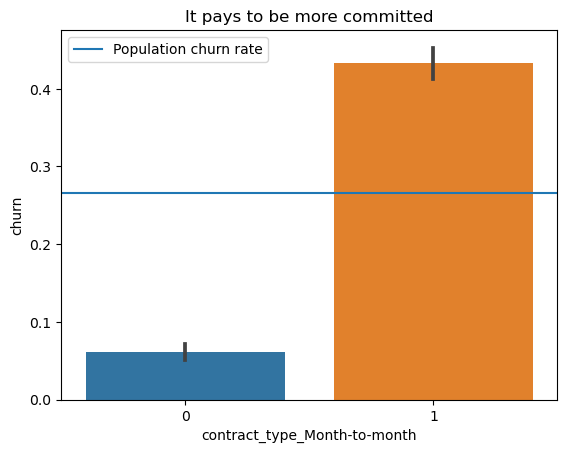

In [11]:
#building a plot to show a relationship
plt.title("It pays to be more committed")
sns.barplot(x='contract_type_Month-to-month', y='churn', data=train_df)
pop_churn_rate = train_df.churn.mean()
plt.axhline(pop_churn_rate, label="Population churn rate")
plt.legend()
plt.show()

#### Q1 Statistical Test <a class="anchor" id="q_1_stats"></a>

In [12]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "customers with Month-to-month contracts and that churn are independent"
alternative_hypothesis = "there is a relationship between customers with Month-to-month contracts and that churn"

# Setup a crosstab of observed churn to contract_type_Month-to-month
observed = pd.crosstab(train_df.churn, train_df['contract_type_Month-to-month'])

chi2, p1, degf, expected = stats.chi2_contingency(observed)

#### Q1 Answer <a class="anchor" id="q_1_ans"></a>

In [13]:
if p1 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p1

Reject the null hypothesis that customers with Month-to-month contracts and that churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers with Month-to-month contracts and that churn


2.6129757677254923e-151

### Question 2 <a class="anchor" id="q_2"></a>

Is there a relationship between having Fiber optic internet service type and churn?

#### Q2 Visualization <a class="anchor" id="q_2_viz"></a>

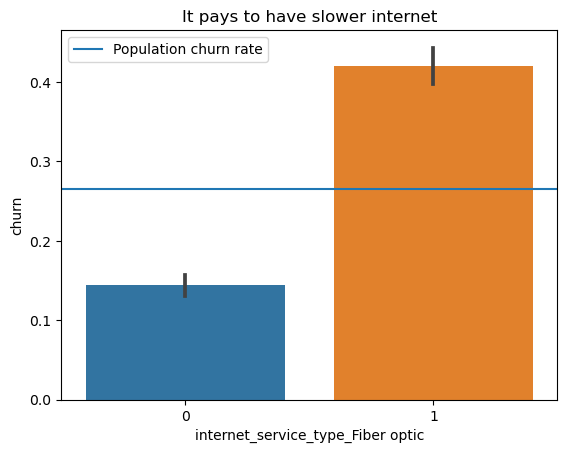

In [14]:
#building a plot to show a relationship
plt.title("It pays to have slower internet")
sns.barplot(x='internet_service_type_Fiber optic', y='churn', data=train_df)
pop_churn_rate = train_df.churn.mean()
plt.axhline(pop_churn_rate, label="Population churn rate")
plt.legend()
plt.show()

#### Q2 Statistical Test <a class="anchor" id="q_2_stats"></a>

In [15]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "customers with fiber optic internet service and that churn are independent"
alternative_hypothesis = "there is a relationship between customers with fiber optic internet service and that churn"

# Setup a crosstab of observed churn to internet_service_type_Fiber optic
observed = pd.crosstab(train_df.churn, train_df['internet_service_type_Fiber optic'])

chi2, p2, degf, expected = stats.chi2_contingency(observed)

#### Q2 Answer <a class="anchor" id="q_2_ans"></a>

In [16]:
if p2 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p2

Reject the null hypothesis that customers with fiber optic internet service and that churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers with fiber optic internet service and that churn


1.5755854888703442e-84

### Question 3 <a class="anchor" id="q_3"></a>

Is there a relationship between paying with Electronic checks and churn?

#### Q3 Visualization <a class="anchor" id="q_3_viz"></a>

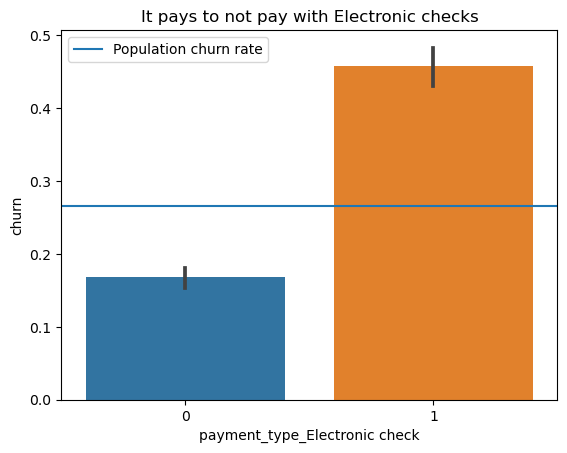

In [17]:
#building a plot to show a relationship
plt.title("It pays to not pay with Electronic checks")
sns.barplot(x='payment_type_Electronic check', y='churn', data=train_df)
pop_churn_rate = train_df.churn.mean()
plt.axhline(pop_churn_rate, label="Population churn rate")
plt.legend()
plt.show()

#### Q3 Statistical Test <a class="anchor" id="q_3_stats"></a>

In [18]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "customers who pay with an electronic check and that churn are independent"
alternative_hypothesis = "there is a relationship between customers that pay with an electronic check and that churn"

# Setup a crosstab of observed churn to payment_type_Electronic check
observed = pd.crosstab(train_df.churn, train_df['payment_type_Electronic check'])

chi2, p3, degf, expected = stats.chi2_contingency(observed)

#### Q3 Answer <a class="anchor" id="q_3_ans"></a>

In [19]:
if p3 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p3

Reject the null hypothesis that customers who pay with an electronic check and that churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers that pay with an electronic check and that churn


5.083307763477863e-84

### Question 4 <a class="anchor" id="q_4"></a>

Is there a relationship between having no internet service and churn?

#### Q4 Visualization <a class="anchor" id="q_4_viz"></a>

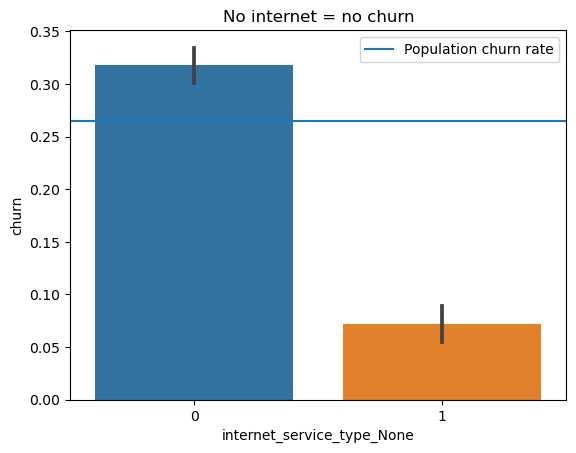

In [20]:
#building a plot to show a relationship
plt.title("No internet = no churn")
sns.barplot(x='internet_service_type_None', y='churn', data=train_df)
pop_churn_rate = train_df.churn.mean()
plt.axhline(pop_churn_rate, label="Population churn rate")
plt.legend()
plt.show()

#### Q4 Statistical Test <a class="anchor" id="q_4_stats"></a>

In [21]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "customers with no internet service and that churn are independent"
alternative_hypothesis = "there is a relationship between customers with no internet service and that churn"

# Setup a crosstab of observed churn to having no internet service
observed = pd.crosstab(train_df.churn, train_df['internet_service_type_None'])

chi2, p4, degf, expected = stats.chi2_contingency(observed)

#### Q4 Answer <a class="anchor" id="q_4_ans"></a>

In [22]:
if p4 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p4

Reject the null hypothesis that customers with no internet service and that churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers with no internet service and that churn


2.8258083144357664e-46

### Question 5 <a class="anchor" id="q_5"></a>

In [23]:
#Doing MVP first

#### Q5 Visualization <a class="anchor" id="q_5_viz"></a>

#### Q5 Statistical Test <a class="anchor" id="q_5_stats"></a>

In [24]:
#One sample T-Test for monthly_charges and churn

#### Q5 Answer <a class="anchor" id="q_5_ans"></a>

### Question 6 <a class="anchor" id="q_6"></a>

In [25]:
#Doing MVP first

#### Q6 Visualization <a class="anchor" id="q_6_viz"></a>

#### Q6 Statistical Test <a class="anchor" id="q_6_stats"></a>

In [26]:
#One sample T-Test for total_charges and churn

#### Q6 Answer <a class="anchor" id="q_6_ans"></a>

## Explore summary <a class="anchor" id="explore2"></a>

During the explore process there were four categorical features which were shown to have a relationship with customer churn. Those are:
1. contract_type_Month-to-month (higher than baseline)
2. internet_service_type_Fiber optic (higher than baseline)
3. payment_type_Electronic check (higher than baseline)
4. internet_service_type_None (lower than baseline)

## Modeling <a class="anchor" id="modeling"></a>

In [27]:
X_train = train_df.drop(columns=['churn'])
y_train = train_df.churn

X_val = val_df.drop(columns = ['churn'])
y_val = val_df.churn

X_test = test_df.drop(columns = ['churn'])
y_test = test_df.churn

### Introduction <a class="anchor" id="m_intro"></a>

### Baseline <a class="anchor" id="baseline"></a>

### Model 1 <a class="anchor" id="mod_1"></a>

In [28]:
#Create the model
clf = DecisionTreeClassifier(max_depth=3, random_state=1969)

In [29]:
#Train the model
clf = clf.fit(X_train, y_train)

In [30]:
#Make prediction on train DataFrame
y_pred1 = clf.predict(X_train)

In [31]:
#Estimate probability
y_pred_proba1 = clf.predict_proba(X_train)

In [32]:
#Finding the Accuracy
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X_train, y_train):.2f}')

Accuracy of Decision Tree classifier on training set: 0.79


In [33]:
#classification report
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2897
           1       0.71      0.37      0.49      1046

    accuracy                           0.79      3943
   macro avg       0.76      0.66      0.68      3943
weighted avg       0.78      0.79      0.77      3943



In [34]:
#Feature importance
for i in range(0,len(X_train.columns)-1):
    print(f'Column: {X_train.columns[i]:40} --- Importance: {clf.feature_importances_[i]}')

Column: paperless_billing                        --- Importance: 0.0
Column: senior_citizen                           --- Importance: 0.0
Column: partner                                  --- Importance: 0.0
Column: dependents                               --- Importance: 0.0
Column: monthly_charges                          --- Importance: 0.011238337568845345
Column: total_charges                            --- Importance: 0.11625140853951926
Column: tenure                                   --- Importance: 0.05698832970400352
Column: gender_Female                            --- Importance: 0.0
Column: gender_Male                              --- Importance: 0.0
Column: streaming_movies_No                      --- Importance: 0.0
Column: streaming_movies_No internet service     --- Importance: 0.0
Column: streaming_movies_Yes                     --- Importance: 0.0
Column: streaming_tv_No                          --- Importance: 0.0
Column: streaming_tv_No internet service         --- I

### Model 2 <a class="anchor" id="mod_2"></a>

In [35]:
#Creating the random forest object
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None,
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3,
                            random_state=1969)

In [36]:
#Fit the model to the train data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=1969)

In [37]:
#Feature importance
for i in range(0,len(X_train.columns)-1):
    print(f'Column: {X_train.columns[i]:40} --- Importance: {rf.feature_importances_[i]}')

Column: paperless_billing                        --- Importance: 0.002869247543384388
Column: senior_citizen                           --- Importance: 0.0002468050343490073
Column: partner                                  --- Importance: 0.0014828180929904603
Column: dependents                               --- Importance: 0.001345730280285333
Column: monthly_charges                          --- Importance: 0.026728977645596726
Column: total_charges                            --- Importance: 0.06161436588170643
Column: tenure                                   --- Importance: 0.13361641866249818
Column: gender_Female                            --- Importance: 0.0002157734525534679
Column: gender_Male                              --- Importance: 0.0
Column: streaming_movies_No                      --- Importance: 0.0011971807526116934
Column: streaming_movies_No internet service     --- Importance: 0.008279677233408084
Column: streaming_movies_Yes                     --- Importance: 0.00

In [38]:
#Make prediction on train DataFrame
y_pred2 = rf.predict(X_train)

#Estimate probability
y_pred_proba2 = rf.predict_proba(X_train)

In [39]:
#Finding the Accuracy
print(f'Accuracy of Decision Tree classifier on training set: {rf.score(X_train, y_train):.2f}')

Accuracy of Decision Tree classifier on training set: 0.79


In [40]:
#classification report
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2897
           1       0.74      0.33      0.46      1046

    accuracy                           0.79      3943
   macro avg       0.77      0.64      0.66      3943
weighted avg       0.78      0.79      0.76      3943



### Model 3 <a class="anchor" id="mod_3"></a>

In [41]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred3 = knn.predict(X_train)

In [44]:
y_pred_proba3 = knn.predict_proba(X_train)

In [45]:
#Finding the Accuracy
print(f'Accuracy of Decision Tree classifier on training set: {knn.score(X_train, y_train):.2f}')

Accuracy of Decision Tree classifier on training set: 0.86


In [46]:
#classification report
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2897
           1       0.77      0.65      0.71      1046

    accuracy                           0.86      3943
   macro avg       0.83      0.79      0.81      3943
weighted avg       0.85      0.86      0.85      3943



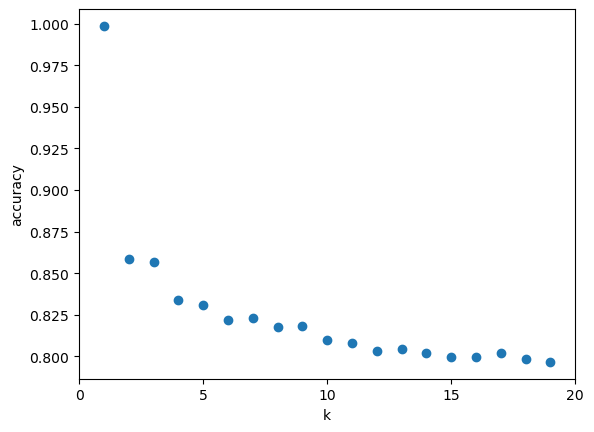

In [47]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

## Conclusion <a class="anchor" id="conclusion"></a>

### Summery <a class="anchor" id="c_summery"></a>

Churn occurs at 26.5% in the Telco dataset. The drivers of churn are: 
- having a month-to-month contract 
- having fiber optic internet 
- low tenure/being a new customer

### Recommendations <a class="anchor" id="c_recs"></a>

- Incentivize Month-to-month and fiber optic customers to stay.
- Consider lowering prices for newer customers.
- Once churn decreases, evaluate pricing power on phone services and possibly raise rates.

### Next Steps <a class="anchor" id="c_steps"></a>

- Do statistical testing on the monthly_charges and total_charges features
- Create a way to compare churn for categorical and continuous features
- Dig in deeper on features which are drivers of churn.
- Add a fourth model using logistic regression to check for improved performance.
- Test multiple numbers for model arguments to see which is the best.
- Evaluate churn against each internet type to see if customers are most